In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [3]:
engine = create_engine('postgresql://localhost:5432/sql_challenge')

In [4]:
connection = engine.connect()

In [11]:
departments = pd.read_sql("SELECT * FROM departments", connection)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", connection)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", connection)


In [5]:
employees = pd.read_sql("SELECT * FROM employees", connection)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [6]:
salary = pd.read_sql("SELECT * FROM salaries", connection)
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


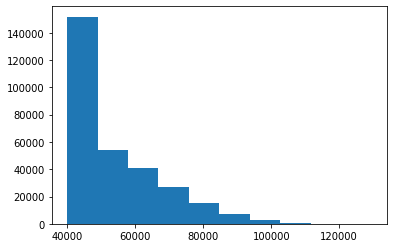

In [19]:
emp_salary = salary['salary']
plt.hist(emp_salary)
plt.show()

In [7]:
title = pd.read_sql('SELECT * FROM titles', connection)
title.head()

,id,emp_no,title,from_date,to_date
0,1,10001,Senior Engineer,1986-06-26,9999-01-01
1,2,10002,Staff,1996-08-03,9999-01-01
2,3,10003,Senior Engineer,1995-12-03,9999-01-01
3,4,10004,Engineer,1986-12-01,1995-12-01
4,5,10004,Senior Engineer,1995-12-01,9999-01-01


In [26]:
salary_title = pd.merge(salary, title, on='emp_no', how='left')
salary_title

,emp_no,salary,from_date_x,to_date_x,id,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,1,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,2,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,3,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,4,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,5,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...
443303,499997,49597,1987-08-30,1988-08-29,443304,Engineer,1987-08-30,1992-08-29
443304,499997,49597,1987-08-30,1988-08-29,443305,Senior Engineer,1992-08-29,9999-01-01
443305,499998,40000,1993-12-27,1994-12-27,443306,Senior Staff,1998-12-27,9999-01-01
443306,499998,40000,1993-12-27,1994-12-27,443307,Staff,1993-12-27,1998-12-27


In [28]:
salary_title_modified = salary_title.drop(columns=['from_date_x', 'to_date_x', 'from_date_y', 'to_date_y', 'id'])
salary_title_modified

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer
...,...,...,...
443303,499997,49597,Engineer
443304,499997,49597,Senior Engineer
443305,499998,40000,Senior Staff
443306,499998,40000,Staff


In [33]:
salary_title_df = salary_title_modified.drop_duplicates(['emp_no'])
salary_title_df

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
5,10005,78228,Senior Staff
...,...,...,...
443300,499995,40000,Engineer
443301,499996,58058,Engineer
443303,499997,49597,Engineer
443305,499998,40000,Senior Staff


In [46]:
salary_title_df_1 = salary_title_df.drop(columns=['emp_no'])

In [47]:
salary_title_grouped = salary_title_df_1.groupby(['title'])
salary_title_grouped.head()


,salary,title
0,60117,Senior Engineer
1,65828,Staff
2,40006,Senior Engineer
3,40054,Engineer
5,78228,Senior Staff
7,40000,Senior Engineer
8,56724,Senior Staff
10,46671,Assistant Engineer
11,60929,Assistant Engineer
14,72488,Engineer


In [51]:
salary_title_grouped_avg = salary_title_grouped.mean().round(2)
salary_title_grouped_avg

,salary
title,
Assistant Engineer,48493.20
Engineer,48547.81
Manager,51531.04
Senior Engineer,48425.49
Senior Staff,58503.84
Staff,58433.37
Technique Leader,48582.90


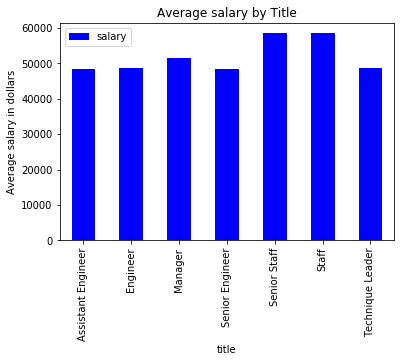

In [55]:
salary_title_grouped_avg.plot(kind='bar', color='b')
plt.ylabel('Average salary in dollars')
plt.title('Average salary by Title')
plt.show()